In [2]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import matplotlib.gridspec as gridspec
#from sklearn.metrics import silhouette_score

result_dir = "../results/revision/analysis/"
plot_dir = "../results/revision/plots/"

batches = ["site1", "site2", "site3", "site4"]
stages = ["E7.5", "E7.75", "E8.0", "E8.5", "E8.75"]

cm = 1 / 2.54

/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/dbm829/anaconda3/envs/multidgd-paper/lib/python

In [3]:
import matplotlib.gridspec as gridspec

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True

## tests

In [25]:
# create a grid of plots with 10 columns and 5 rows
import matplotlib.gridspec as gridspec

# set up figure
n_cols = 4
n_rows = 3
cm = 1 / 2.54
figure_height = 18 * (n_rows / n_cols)
fig = plt.figure(figsize=(18 * cm, figure_height * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
#gs.update(wspace=0.5, hspace=0.5)
ax_list = []

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True

<Figure size 708.661x531.496 with 0 Axes>

In [3]:
# first, access the predictions for the normal models
n_features_bm = 129921
predictions_bonemarrow_original = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_none_prediction_errors_default.csv"))
#predictions_gastrulation_original = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation_none_prediction_errors_default.csv"))
hue_bonemarrow = predictions_bonemarrow_original["batch_id"]

In [26]:
# loop through the batches, get the representations and predictions and make the representation plots
for i, batch in enumerate(batches):
    # get the representations (they are stored as numpy arrays)
    rep_default = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_default.npy".format(
                batch
            ),
        )
    )
    rep_sup = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_supervised.npy".format(
                batch
            ),
        )
    )
    # make dataframes out of the reps and randomise the order
    rep_default = pd.DataFrame(rep_default, columns=["D1", "D2"])
    rep_default["batch"] = hue_bonemarrow
    # rep_default = rep_default.sample(frac=1)
    rep_sup = pd.DataFrame(rep_sup, columns=["D1", "D2"])
    rep_sup["batch"] = hue_bonemarrow
    # rep_sup = rep_sup.sample(frac=1)
    # plot them
    ax_list.append(fig.add_subplot(gs[0, i]))
    sns.scatterplot(
        data=rep_default,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    ax_list[-1].set_title("left out: {}".format(batch))
    ax_list.append(fig.add_subplot(gs[1, i]))
    sns.scatterplot(
        data=rep_sup,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    # remove the legends unless its the last plot
    if i < len(batches) - 1:
        ax_list[-2].get_legend().remove()
        ax_list[-1].get_legend().remove()
    else:
        ax_list[-2].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
        ax_list[-1].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
    # remove axis labels and ticks
    if i > 0:
        ax_list[-1].set_xlabel("")
        ax_list[-1].set_ylabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-2].set_ylabel("")
    else:
        ax_list[-1].set_xlabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-1].set_ylabel("supervised")
        ax_list[-2].set_ylabel("naive")
    # remove all axis ticks
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-2].set_xticks([])
    ax_list[-2].set_yticks([])

    # get the predictions
    if i == 0:
        pred_default = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
    else:
        pred_default_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
        pred_default = pd.concat([pred_default, pred_default_temp])
        pred_sup = pd.concat([pred_sup, pred_sup_temp])

# now prepare the data for the stage plots
predictions_bonemarrow_original["prediction_type"] = "naive (trained on all)"
# only keep the entries where batch_id and model_id are the same
pred_default = pred_default[pred_default["batch_id"] == pred_default["model_id"]]
pred_default["prediction_type"] = "naive (left-out)"
pred_sup = pred_sup[pred_sup["batch_id"] == pred_sup["model_id"]]
pred_sup["prediction_type"] = "supervised (left-out)"
# combine the dataframes
predictions_bonemarrow = pd.concat(
    [predictions_bonemarrow_original, pred_default, pred_sup]
)
predictions_bonemarrow["error"] = predictions_bonemarrow["error"] / n_features_bm

# make a boxplot with the batch_id on the x axis and the prediction error on the y axis
ax_list.append(fig.add_subplot(gs[2, : len(batches)]))
# sns.boxplot(x="batch_id", y="error", data=predictions_bonemarrow, hue="prediction_type", palette=palette_3colrs, ax=ax_list[-1], linewidth=linewidth, dodge=dodge, fliersize=0.1)
# violinplot
sns.violinplot(
    x="batch_id",
    y="error",
    data=predictions_bonemarrow,
    hue="prediction_type",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("Prediction error")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)
"""
# now plot error ratios
ax_list.append(fig.add_subplot(gs[3, : len(batches)]))
predictions_bonemarrow_relative = pred_sup.copy()
predictions_bonemarrow_relative["error"] = (
    predictions_bonemarrow_relative["error"] / predictions_bonemarrow_original["error"]
)
sns.violinplot(
    x="batch_id",
    y="error",
    data=predictions_bonemarrow_relative,
    hue="prediction_type",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("Relative prediction error")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)
"""

'\n# now plot error ratios\nax_list.append(fig.add_subplot(gs[3, : len(batches)]))\npredictions_bonemarrow_relative = pred_sup.copy()\npredictions_bonemarrow_relative["error"] = (\n    predictions_bonemarrow_relative["error"] / predictions_bonemarrow_original["error"]\n)\nsns.violinplot(\n    x="batch_id",\n    y="error",\n    data=predictions_bonemarrow_relative,\n    hue="prediction_type",\n    palette=palette_3colrs,\n    ax=ax_list[-1],\n    linewidth=linewidth,\n    dodge="auto",\n    cut=0,\n    inner="quart",\n    width=0.6\n)\nax_list[-1].set_ylabel("Relative prediction error")\nax_list[-1].legend(\n    bbox_to_anchor=(1.02, 1),\n    loc=2,\n    borderaxespad=0.0,\n    frameon=False,\n    handletextpad=handletextpad * 5,\n)\n'

In [27]:
# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_representations_and_predictions.png"), bbox_inches="tight", dpi=300)

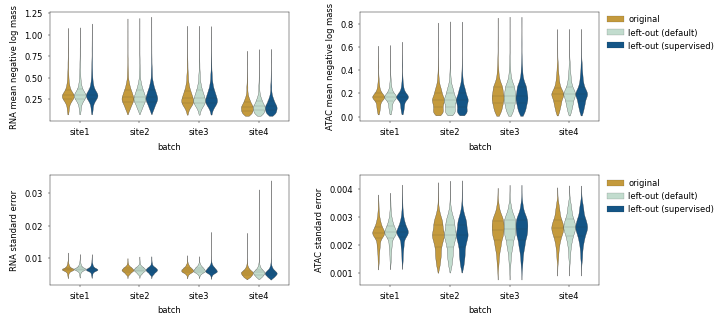

In [33]:
# load the sample-wise errors for the original model
sample_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_none_errors_samplewise_default.csv"))
sample_errors["model"] = "original"
# loop through the batches and get the sample-wise errors for the left-out batches
for i, batch in enumerate(batches):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_{}_errors_samplewise_default.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "left-out (default)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_{}_errors_samplewise_supervised.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "left-out (supervised)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])

# make a violinplot with the batch_id on the x axis and the prediction error on the y axis
# new figure
fig = plt.figure(figsize=(18 * cm, 9 * cm))
gs = gridspec.GridSpec(2, 2)
# add spacing
gs.update(wspace=0.3, hspace=0.5)
ax_list = []
# violinplot
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.violinplot(
    x="batch",
    y="rna_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("RNA mean negative log mass")
ax_list[-1].legend().remove()
# violinplot
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.violinplot(
    x="batch",
    y="atac_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("ATAC mean negative log mass")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)
# violinplot
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.violinplot(
    x="batch",
    y="rna_se",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("RNA standard error")
ax_list[-1].legend().remove()
# violinplot
ax_list.append(fig.add_subplot(gs[1, 1]))
sns.violinplot(
    x="batch",
    y="atac_se",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    linewidth=linewidth,
    dodge="auto",
    cut=0,
    inner="quart",
    width=0.6
)
ax_list[-1].set_ylabel("ATAC standard error")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_samplewise_errors_leaveoneout.png"), bbox_inches="tight", dpi=300)

In [77]:
# include significance tests
from itertools import combinations
import scipy.stats

models = sample_errors['model'].unique()
batches = sample_errors['batch'].unique()
significance_dict = {}

for batch in batches:
    data_batch = sample_errors[sample_errors['batch'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['model'] == model1]['rna_mean']
        group2 = data_batch[data_batch['model'] == model2]['rna_mean']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "rna")] = significant

        group1 = data_batch[data_batch['model'] == model1]['atac_mean']
        group2 = data_batch[data_batch['model'] == model2]['atac_mean']

        # Perform t-test
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "atac")] = significant

significance_dict

{('site1', 'original', 'left-out (default)', 'rna'): False,
 ('site1', 'original', 'left-out (default)', 'atac'): False,
 ('site1', 'original', 'left-out (supervised)', 'rna'): True,
 ('site1', 'original', 'left-out (supervised)', 'atac'): False,
 ('site1', 'left-out (default)', 'left-out (supervised)', 'rna'): False,
 ('site1', 'left-out (default)', 'left-out (supervised)', 'atac'): False,
 ('site2', 'original', 'left-out (default)', 'rna'): False,
 ('site2', 'original', 'left-out (default)', 'atac'): False,
 ('site2', 'original', 'left-out (supervised)', 'rna'): False,
 ('site2', 'original', 'left-out (supervised)', 'atac'): False,
 ('site2', 'left-out (default)', 'left-out (supervised)', 'rna'): False,
 ('site2', 'left-out (default)', 'left-out (supervised)', 'atac'): False,
 ('site3', 'original', 'left-out (default)', 'rna'): False,
 ('site3', 'original', 'left-out (default)', 'atac'): False,
 ('site3', 'original', 'left-out (supervised)', 'rna'): False,
 ('site3', 'original', 'lef

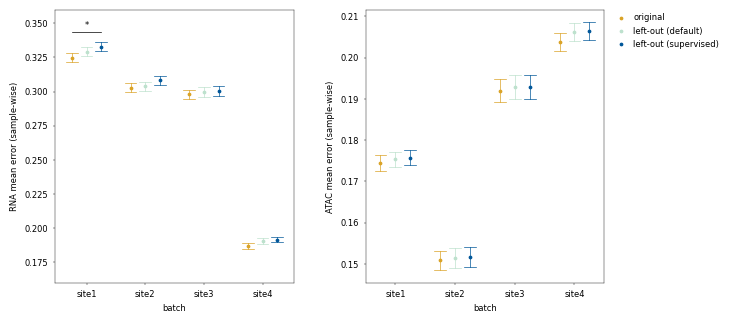

In [76]:
# now make the plot for the means (first row) as a point plot with standard error
# new figure
fig = plt.figure(figsize=(18 * cm, 9 * cm))
gs = gridspec.GridSpec(1, 2)
# add spacing
gs.update(wspace=0.3, hspace=0.5)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="batch",
    y="rna_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylim(0.16, 0.36)
# add a line and asterisk for significance over the first batch between first and last model
ax_list[-1].plot(
    [-0.25, 0.25],
    [sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.015] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    0,
    sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.02,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].set_ylabel("RNA mean error (sample-wise)")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.pointplot(
    x="batch",
    y="atac_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ATAC mean error (sample-wise)")
ax_list[-1].legend(
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_samplewise_errors_leaveoneout_pointplot.png"), bbox_inches="tight", dpi=300)

In [94]:
# include significance tests
from itertools import combinations
import scipy.stats

models = sample_errors['model'].unique()
batches = sample_errors['batch'].unique()
significance_dict = {}

sample_errors['mean_error'] = sample_errors['rna_mean'] + sample_errors['atac_mean']

for batch in batches:
    data_batch = sample_errors[sample_errors['batch'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['model'] == model1]['mean_error']
        group2 = data_batch[data_batch['model'] == model2]['mean_error']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2)] = significant

significance_dict

{('site1', 'original', 'left-out (default)'): False,
 ('site1', 'original', 'left-out (supervised)'): False,
 ('site1', 'left-out (default)', 'left-out (supervised)'): False,
 ('site2', 'original', 'left-out (default)'): False,
 ('site2', 'original', 'left-out (supervised)'): False,
 ('site2', 'left-out (default)', 'left-out (supervised)'): False,
 ('site3', 'original', 'left-out (default)'): False,
 ('site3', 'original', 'left-out (supervised)'): False,
 ('site3', 'left-out (default)', 'left-out (supervised)'): False,
 ('site4', 'original', 'left-out (default)'): False,
 ('site4', 'original', 'left-out (supervised)'): False,
 ('site4', 'left-out (default)', 'left-out (supervised)'): False}

In [106]:
# load the sample-wise errors for the original model
sample_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_none_errors_samplewise_default.csv"))
sample_errors["model"] = "full"
# loop through the batches and get the sample-wise errors for the left-out batches
for i, batch in enumerate(batches):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_{}_errors_samplewise_default.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (naive)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_{}_errors_samplewise_supervised.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (supervised)"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
random_seeds = [0, 37, 8790]
for i, seed in enumerate(random_seeds):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow/human_bonemarrow_75percent_rs{}_errors_samplewise.csv".format(seed)))
    sample_errors_temp["model"] = "75%"
    sample_errors = pd.concat([sample_errors, sample_errors_temp])
# sort the dataframe by model with specific order (as categorical)
sample_errors["model"] = pd.Categorical(sample_errors["model"], ["full", "75%", "leave-one-out (naive)", "leave-one-out (supervised)"])
sample_errors['mean_error'] = sample_errors['rna_mean'] + sample_errors['atac_mean']

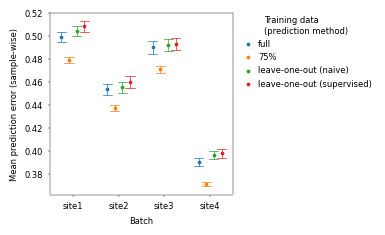

In [107]:
# now make the plot for the means (first row) as a point plot with standard error
# new figure
fig = plt.figure(figsize=(6 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
# add spacing
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="batch",
    y="mean_error",
    data=sample_errors,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Batch")
#handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    #handles,
    #["full", "leave-one-out\n(naive)", "leave-one-out\n(supervised)"],
    title="Training data\n(prediction method)",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_samplewise_errors_leaveoneout_pointplot_totalerror_2.png"), bbox_inches="tight", dpi=300)

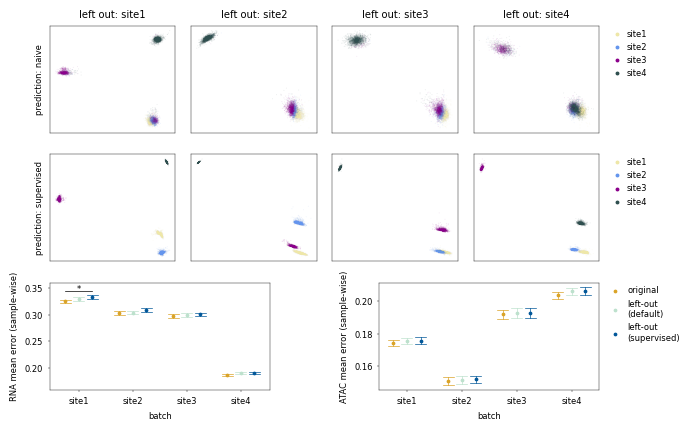

In [93]:
# create a grid of plots with 10 columns and 5 rows
import matplotlib.gridspec as gridspec

# set up figure
n_cols = 12
n_rows = 3
cm = 1 / 2.54
figure_height = 12
fig = plt.figure(figsize=(18 * cm, figure_height * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
gs.update(wspace=0.5, hspace=0.2)
ax_list = []

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True

# loop through the batches, get the representations and predictions and make the representation plots
for i, batch in enumerate(batches):
    # get the representations (they are stored as numpy arrays)
    rep_default = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_default.npy".format(
                batch
            ),
        )
    )
    rep_sup = np.load(
        os.path.join(
            result_dir,
            "batch_integration/human_bonemarrow_{}_covariate_representations_supervised.npy".format(
                batch
            ),
        )
    )
    # make dataframes out of the reps and randomise the order
    rep_default = pd.DataFrame(rep_default, columns=["D1", "D2"])
    rep_default["batch"] = hue_bonemarrow
    # rep_default = rep_default.sample(frac=1)
    rep_sup = pd.DataFrame(rep_sup, columns=["D1", "D2"])
    rep_sup["batch"] = hue_bonemarrow
    # rep_sup = rep_sup.sample(frac=1)
    # plot them
    ax_list.append(fig.add_subplot(gs[0, (i*3):((i+1)*3)]))
    sns.scatterplot(
        data=rep_default,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    ax_list[-1].set_title("left out: {}".format(batch))
    ax_list.append(fig.add_subplot(gs[1, (i*3):((i+1)*3)]))
    sns.scatterplot(
        data=rep_sup,
        x="D1",
        y="D2",
        hue="batch",
        palette=batch_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    # remove the legends unless its the last plot
    if i < len(batches) - 1:
        ax_list[-2].get_legend().remove()
        ax_list[-1].get_legend().remove()
    else:
        ax_list[-2].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
        ax_list[-1].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
    # remove axis labels and ticks
    if i > 0:
        ax_list[-1].set_xlabel("")
        ax_list[-1].set_ylabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-2].set_ylabel("")
    else:
        ax_list[-1].set_xlabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-1].set_ylabel("prediction: supervised")
        ax_list[-2].set_ylabel("prediction: naive")
    # remove all axis ticks
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-2].set_xticks([])
    ax_list[-2].set_yticks([])

    # get the predictions
    if i == 0:
        pred_default = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
    else:
        pred_default_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_default.csv".format(
                    batch
                ),
            )
        )
        pred_sup_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/human_bonemarrow_{}_prediction_errors_supervised.csv".format(
                    batch
                ),
            )
        )
        pred_default = pd.concat([pred_default, pred_default_temp])
        pred_sup = pd.concat([pred_sup, pred_sup_temp])

# now prepare the data for the stage plots
predictions_bonemarrow_original["prediction_type"] = "naive (trained on all)"
# only keep the entries where batch_id and model_id are the same
pred_default = pred_default[pred_default["batch_id"] == pred_default["model_id"]]
pred_default["prediction_type"] = "naive (left-out)"
pred_sup = pred_sup[pred_sup["batch_id"] == pred_sup["model_id"]]
pred_sup["prediction_type"] = "supervised (left-out)"
# combine the dataframes
predictions_bonemarrow = pd.concat(
    [predictions_bonemarrow_original, pred_default, pred_sup]
)
predictions_bonemarrow["error"] = predictions_bonemarrow["error"] / n_features_bm

ax_list.append(fig.add_subplot(gs[2, :5]))
sns.pointplot(
    x="batch",
    y="rna_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylim(0.16, 0.36)
# add a line and asterisk for significance over the first batch between first and last model
ax_list[-1].plot(
    [-0.25, 0.25],
    [sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.015] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    0,
    sample_errors[sample_errors['batch'] == 'site1']['rna_mean'].mean() + 0.02,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].set_ylabel("RNA mean error (sample-wise)")
ax_list[-1].legend().remove()

ax_list.append(fig.add_subplot(gs[2, 7:]))
sns.pointplot(
    x="batch",
    y="atac_mean",
    data=sample_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ATAC mean error (sample-wise)")
# change the legend labels to include a line break
handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    handles,
    ["original", "left-out\n(default)", "left-out\n(supervised)"],
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_representations_and_errors.png"), bbox_inches="tight", dpi=300)

In [ ]:
# calculate the mean error and standard error of the mean for each batch and model type
mean_errors_rna = []
mean_errors_atac = []
se_errors_rna = []
se_errors_atac = []
batch_ids = []
model_ids = []
for batch in batches:
    for mod_id in sample_errors["model"].unique():
        batch_ids.append(batch)
        model_ids.append(mod_id)
        mean_errors_rna.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["rna_mean"].mean()
        )
        mean_errors_atac.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["atac_mean"].mean()
        )
        se_errors_rna.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["rna_mean"].std() / np.sqrt(sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)].shape[0])
        )
        se_errors_atac.append(
            sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)]["atac_mean"].std() / np.sqrt(sample_errors[(sample_errors["batch"] == batch) & (sample_errors["model"] == mod_id)].shape[0])
        )
# now make a dataframe and plot
mean_errors_with_se = pd.DataFrame(
    {
        "batch": batch_ids,
        "model": model_ids,
        "rna_mean": mean_errors_rna,
        "atac_mean": mean_errors_atac,
        "rna_se": se_errors_rna,
        "atac_se": se_errors_atac,
    }
)
mean_errors_with_se

In [34]:
# now load the genewise errors of the original model 
# and plot them as a scatter and density plot next to each other
# with the error on the y axis and the mean expression on the x axis
# make two rows for rna and atac

# first load the data and get mean expression
import anndata as ad
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
testset = adata[test_indices, :].copy()
adata = None
modality_switch = 13431
rna_means = np.asarray(np.mean(testset.X[:,:modality_switch], axis=0)).flatten()
atac_means = np.asarray(np.mean(testset.X[:,modality_switch:], axis=0)).flatten()
rna_variances = np.asarray(np.var(testset.X[:,:modality_switch], axis=0)).flatten()
atac_variances = np.asarray(np.var(testset.X[:,modality_switch:], axis=0)).flatten()

rna_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/human_bonemarrow_none_errors_genewise_default.csv"))
rna_errors

,Unnamed: 0,rna_mean,rna_std,rna_se,feature,modality,atac_mean,atac_std,atac_se
0,0,0.052120,0.428889,0.005154,AL627309.5,rna,NaN,NaN,NaN
1,1,0.152116,0.652019,0.007835,LINC01409,rna,NaN,NaN,NaN
2,2,0.161626,0.659366,0.007923,LINC01128,rna,NaN,NaN,NaN
3,3,0.188455,0.681650,0.008191,NOC2L,rna,NaN,NaN,NaN
4,4,0.039675,0.416014,0.004999,KLHL17,rna,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
129916,116485,NaN,NaN,NaN,GL000219.1-90062-90937,atac,0.056751,0.620691,0.007459
129917,116486,NaN,NaN,NaN,GL000219.1-99257-100160,atac,0.939065,1.436662,0.017264
129918,116487,NaN,NaN,NaN,KI270726.1-27152-28034,atac,0.071392,0.690964,0.008303
129919,116488,NaN,NaN,NaN,KI270713.1-21434-22336,atac,1.045618,1.528031,0.018362


In [44]:
rna_variances = np.var(np.asarray(testset.X[:,:modality_switch].todense()), axis=0).flatten()
atac_variances = np.var(np.asarray(testset.X[:,modality_switch:].todense()), axis=0).flatten()

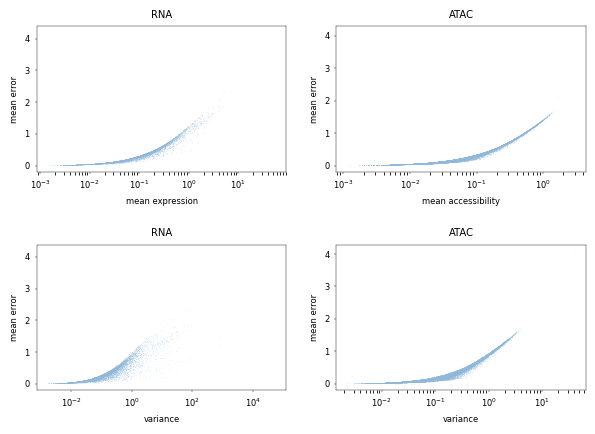

In [47]:
# prep the plot
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 2)
# add spacing
gs.update(wspace=0.2, hspace=0.5)

# plot the rna errors
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.scatterplot(x=rna_means, y=rna_errors[rna_errors["modality"] == "rna"]["rna_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("mean expression")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("RNA")
ax_list[-1].set_xscale("log")
# same over variance
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.scatterplot(x=rna_variances, y=rna_errors[rna_errors["modality"] == "rna"]["rna_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("variance")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("RNA")
ax_list[-1].set_xscale("log")
# plot the atac errors
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(x=atac_means, y=rna_errors[rna_errors["modality"] == "atac"]["atac_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("mean accessibility")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("ATAC")
ax_list[-1].set_xscale("log")
# same over variance
ax_list.append(fig.add_subplot(gs[1, 1]))
sns.scatterplot(x=atac_variances, y=rna_errors[rna_errors["modality"] == "atac"]["atac_mean"], s=point_size, linewidth=point_linewidth, alpha=alpha, ax=ax_list[-1])
ax_list[-1].set_xlabel("variance")
ax_list[-1].set_ylabel("mean error")
ax_list[-1].set_title("ATAC")
ax_list[-1].set_xscale("log")

# save the figure
fig.savefig(os.path.join(plot_dir, "human_bonemarrow_genewise_errors_original.png"), bbox_inches="tight", dpi=300)

In [ ]:
# read in the recon metrics

## mouse gastrulation

In [129]:
# first, access the predictions for the normal models
data_name = "mouse_gastrulation"
n_features_mg = 11792+69862
predictions_gast_original = pd.read_csv(os.path.join(result_dir, "batch_integration/{}/{}_none_prediction_errors_default.csv".format(data_name, data_name)))
#predictions_gastrulation_original = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation_none_prediction_errors_default.csv"))
hue_gast = predictions_gast_original["batch_id"]

In [148]:
# load the sample-wise errors for the original model
sample_gast_errors = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation/mouse_gastrulation_none_errors_samplewise_default.csv"))
sample_gast_errors["model"] = "full"
# loop through the batches and get the sample-wise errors for the left-out batches
for i, batch in enumerate(stages):
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation/mouse_gastrulation_{}_errors_samplewise_default.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (naive)"
    sample_gast_errors = pd.concat([sample_gast_errors, sample_errors_temp])
    sample_errors_temp = pd.read_csv(os.path.join(result_dir, "batch_integration/mouse_gastrulation/mouse_gastrulation_{}_errors_samplewise_supervised.csv".format(batch)))
    # only keep the entries where batch_id and model_id are the same
    sample_errors_temp = sample_errors_temp[sample_errors_temp["batch"] == batch]
    sample_errors_temp["model"] = "leave-one-out (supervised)"
    sample_gast_errors = pd.concat([sample_gast_errors, sample_errors_temp])
# sort the dataframe by model with specific order (as categorical)
sample_gast_errors["model"] = pd.Categorical(sample_gast_errors["model"], ["full", "leave-one-out (naive)", "leave-one-out (supervised)"])
sample_gast_errors['mean_error'] = sample_gast_errors['rna_mean'] + sample_gast_errors['atac_mean']

In [149]:
# include significance tests
from itertools import combinations
import scipy.stats

models = sample_gast_errors['model'].unique()
batches = sample_gast_errors['batch'].unique()
significance_dict = {}

for batch in stages:
    data_batch = sample_gast_errors[sample_gast_errors['batch'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['model'] == model1]['rna_mean']
        group2 = data_batch[data_batch['model'] == model2]['rna_mean']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "rna")] = significant

        group1 = data_batch[data_batch['model'] == model1]['atac_mean']
        group2 = data_batch[data_batch['model'] == model2]['atac_mean']

        # Perform t-test
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        significance_dict[(batch, model1, model2, "atac")] = significant

# print all entries that are significant
for key, value in significance_dict.items():
    if value:
        print(key)

('E7.5', 'full', 'leave-one-out (naive)', 'rna')
('E7.5', 'full', 'leave-one-out (supervised)', 'rna')
('E8.0', 'full', 'leave-one-out (supervised)', 'rna')
('E8.0', 'leave-one-out (naive)', 'leave-one-out (supervised)', 'rna')
('E8.5', 'full', 'leave-one-out (supervised)', 'rna')
('E8.75', 'full', 'leave-one-out (supervised)', 'rna')
('E8.75', 'leave-one-out (naive)', 'leave-one-out (supervised)', 'rna')


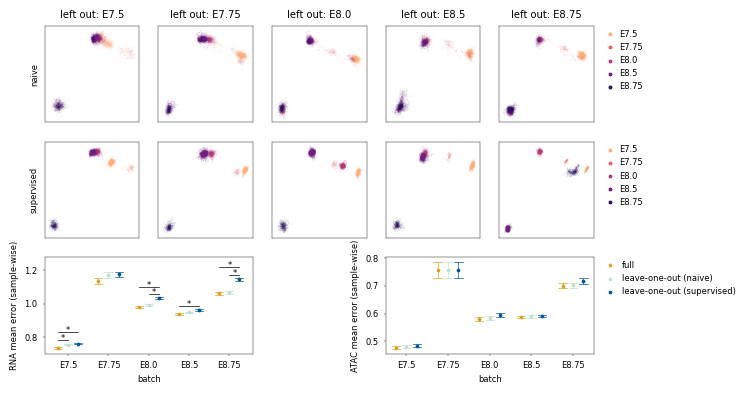

In [162]:
# create a grid of plots with 10 columns and 5 rows
import matplotlib.gridspec as gridspec

# set up figure
n_cols = 5
n_rows = 3
cm = 1 / 2.54
figure_height = 18 * (n_rows / n_cols)
fig = plt.figure(figsize=(18 * cm, figure_height * cm))
gs = gridspec.GridSpec(n_rows, n_cols)
#gs.update(wspace=0.5, hspace=0.5)
ax_list = []

batch_palette = ["#EEE7A8", "cornflowerblue", "darkmagenta", "darkslategray"]
stage_palette = "magma_r"
palette_3colrs = ["#DAA327", "#BDE1CD", "#015799"]

plt.rcParams.update(
    {
        "font.size": 6,
        "axes.linewidth": 0.3,
        "xtick.major.size": 1.5,
        "xtick.major.width": 0.3,
        "ytick.major.size": 1.5,
        "ytick.major.width": 0.3,
    }
)

handletextpad = 0.1
#legend_x_dist, legend_y_dist = -0.0, 0.0
#grid_letter_positions = [-0.1, 0.05]
#grid_letter_fontsize = 8
#grid_letter_fontfamily = "sans-serif"
#grid_letter_fontweight = "bold"
#heatmap_fontsize = 4
point_size = 0.5
linewidth = 0.2
alpha = 0.1
point_linewidth = 0.0
handlesize = 0.3
dodge = True

# loop through the batches, get the representations and predictions and make the representation plots
for i, batch in enumerate(stages):
    # get the representations (they are stored as numpy arrays)
    rep_default = np.load(
        os.path.join(
            result_dir,
            "batch_integration/{}/{}_{}_covariate_representations_default.npy".format(
                data_name, data_name, batch
            ),
        )
    )
    rep_sup = np.load(
        os.path.join(
            result_dir,
            "batch_integration/{}/{}_{}_covariate_representations_supervised.npy".format(
                data_name, data_name, batch
            ),
        )
    )
    # make dataframes out of the reps and randomise the order
    rep_default = pd.DataFrame(rep_default, columns=["D1", "D2"])
    rep_default["batch"] = hue_gast
    # rep_default = rep_default.sample(frac=1)
    rep_sup = pd.DataFrame(rep_sup, columns=["D1", "D2"])
    rep_sup["batch"] = hue_gast
    # rep_sup = rep_sup.sample(frac=1)
    # plot them
    ax_list.append(fig.add_subplot(gs[0, i]))
    sns.scatterplot(
        data=rep_default,
        x="D1",
        y="D2",
        hue="batch",
        palette=stage_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    ax_list[-1].set_title("left out: {}".format(batch))
    ax_list.append(fig.add_subplot(gs[1, i]))
    sns.scatterplot(
        data=rep_sup,
        x="D1",
        y="D2",
        hue="batch",
        palette=stage_palette,
        alpha=alpha,
        ax=ax_list[-1],
        s=point_size,
        linewidth=point_linewidth,
    )
    # remove the legends unless its the last plot
    if i < len(stages) - 1:
        ax_list[-2].get_legend().remove()
        ax_list[-1].get_legend().remove()
    else:
        ax_list[-2].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
        ax_list[-1].legend(
            bbox_to_anchor=(1.05, 1),
            loc=2,
            borderaxespad=0.0,
            frameon=False,
            handletextpad=handletextpad,
            markerscale=handlesize,
        )
    # remove axis labels and ticks
    if i > 0:
        ax_list[-1].set_xlabel("")
        ax_list[-1].set_ylabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-2].set_ylabel("")
    else:
        ax_list[-1].set_xlabel("")
        ax_list[-2].set_xlabel("")
        ax_list[-1].set_ylabel("supervised")
        ax_list[-2].set_ylabel("naive")
    # remove all axis ticks
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-2].set_xticks([])
    ax_list[-2].set_yticks([])

    # get the predictions
    if i == 0:
        pred_default = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_default.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
        pred_sup = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_supervised.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
    else:
        pred_default_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_default.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
        pred_sup_temp = pd.read_csv(
            os.path.join(
                result_dir,
                "batch_integration/{}/{}_{}_prediction_errors_supervised.csv".format(
                    data_name, data_name, batch
                ),
            )
        )
        pred_default = pd.concat([pred_default, pred_default_temp])
        pred_sup = pd.concat([pred_sup, pred_sup_temp])

# now prepare the data for the stage plots
predictions_gast_original["prediction_type"] = "naive (trained on all)"
# only keep the entries where batch_id and model_id are the same
pred_default = pred_default[pred_default["batch_id"] == pred_default["model_id"]]
pred_default["prediction_type"] = "naive (left-out)"
pred_sup = pred_sup[pred_sup["batch_id"] == pred_sup["model_id"]]
pred_sup["prediction_type"] = "supervised (left-out)"
# combine the dataframes
predictions_gast = pd.concat(
    [predictions_gast_original, pred_default, pred_sup]
)
predictions_gast["error"] = predictions_gast["error"] / n_features_mg

# make a boxplot with the batch_id on the x axis and the prediction error on the y axis
#ax_list.append(fig.add_subplot(gs[2, : len(stages)]))
ax_list.append(fig.add_subplot(gs[2, :2]))
sns.pointplot(
    x="batch",
    y="rna_mean",
    data=sample_gast_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("RNA mean error (sample-wise)")
# change the legend labels to include a line break
handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend().remove()
ax_list[-1].plot(
    [-0.25, 0],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.03] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [-0.25, 0.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.08] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    -0.125,
    sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.04,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    0,
    sample_gast_errors[sample_gast_errors['batch'] == 'E7.5']['rna_mean'].mean() + 0.09,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
# E8.0
ax_list[-1].plot(
    [1.75, 2.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.1] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [2.0, 2.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.06] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    2,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.11,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    2.125,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.0']['rna_mean'].mean() + 0.07,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
# E8.5
ax_list[-1].plot(
    [2.75, 3.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.5']['rna_mean'].mean() + 0.04] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    3,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.5']['rna_mean'].mean() + 0.05,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
# E8.75
ax_list[-1].plot(
    [3.75, 4.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.13] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [4.0, 4.25],
    [sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.08] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    4,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.14,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    4.125,
    sample_gast_errors[sample_gast_errors['batch'] == 'E8.75']['rna_mean'].mean() + 0.09,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].set_ylim(0.7, 1.28)

ax_list.append(fig.add_subplot(gs[2, 3:]))
sns.pointplot(
    x="batch",
    y="atac_mean",
    data=sample_gast_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ATAC mean error (sample-wise)")
# change the legend labels to include a line break
#handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    #handles,
    #["original", "left-out\n(default)", "left-out\n(supervised)"],
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 5,
)

# save the figure
fig.savefig(os.path.join(plot_dir, "mouse_gastrulation_representations_and_predictions.png"), bbox_inches="tight", dpi=300)

In [166]:
predictions_gast

,Unnamed: 0,sample_id,batch_id,error,model_id,prediction_type
0,0,E7.5_rep1#AAACCGAAGTTGTCAA-1,E7.5,0.897963,none,naive (trained on all)
1,1,E7.5_rep1#AAACCGGCAACCTAAT-1,E7.5,0.675616,none,naive (trained on all)
2,2,E7.5_rep1#AAACGTACAAACCTTG-1,E7.5,0.927161,none,naive (trained on all)
3,3,E7.5_rep1#AAAGCAAGTCGAAGTC-1,E7.5,0.255326,none,naive (trained on all)
4,4,E7.5_rep1#AAAGCCGCAGCTAACC-1,E7.5,0.268463,none,naive (trained on all)
...,...,...,...,...,...,...
5681,5681,E8.75_rep2#TTTCCTGAGGTCTTGG-1,E8.75,1.140129,E8.75,supervised (left-out)
5682,5682,E8.75_rep2#TTTCTTGCACACCAAC-1,E8.75,0.321621,E8.75,supervised (left-out)
5683,5683,E8.75_rep2#TTTGACCGTAGCTAAT-1,E8.75,0.429117,E8.75,supervised (left-out)
5684,5684,E8.75_rep2#TTTGGCTGTAGTTGGC-1,E8.75,0.627715,E8.75,supervised (left-out)


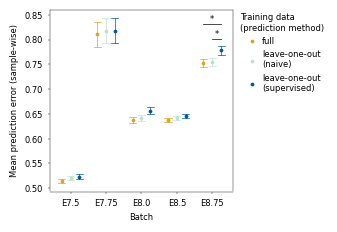

In [174]:
# now make the plot for the means (first row) as a point plot with standard error
# new figure
fig = plt.figure(figsize=(6 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
# add spacing
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="batch_id",
    y="error",
    data=predictions_gast,
    hue="prediction_type",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Batch")
handles, labels = ax_list[-1].get_legend_handles_labels()
ax_list[-1].legend(
    handles,
    ["full", "leave-one-out\n(naive)", "leave-one-out\n(supervised)"],
    title="Training data\n(prediction method)",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)

ax_list[-1].plot(
    [3.75, 4.25],
    [predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.07] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].plot(
    [4.0, 4.25],
    [predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.04] *2,
    color='black',
    linewidth=0.5
)
ax_list[-1].text(
    4,
    predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.08,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)
ax_list[-1].text(
    4.125,
    predictions_gast[predictions_gast['batch_id'] == 'E8.75']['error'].mean() + 0.05,
    "*",
    horizontalalignment='center',
    verticalalignment='center'
)

# save the figure
fig.savefig(os.path.join(plot_dir, "mouse_gastrulation_samplewise_errors_leaveoneout_pointplot_totalerror.png"), bbox_inches="tight", dpi=300)

In [176]:
# include significance tests
from itertools import combinations
import scipy.stats

models = predictions_gast['prediction_type'].unique()
batches = predictions_gast['batch_id'].unique()
significance_dict = {}

for batch in stages:
    data_batch = predictions_gast[predictions_gast['batch_id'] == batch]
    for model1, model2 in combinations(models, 2):
        group1 = data_batch[data_batch['prediction_type'] == model1]['error']
        group2 = data_batch[data_batch['prediction_type'] == model2]['error']

        # Perform t-test
        #print(scipy.stats.mannwhitneyu(group1, group2))
        _, p_value = scipy.stats.mannwhitneyu(group1, group2)
        significant = p_value < 0.05

        # Store the significance
        if significant:
            significance_dict[(batch, model1, model2)] = p_value
        else:
            significance_dict[(batch, model1, model2)] = significant

# print all entries that are significant
for key, value in significance_dict.items():
    if value:
        print(key, value)

('E8.75', 'naive (trained on all)', 'supervised (left-out)') 0.02961370969428476
('E8.75', 'naive (left-out)', 'supervised (left-out)') 0.04600888065474628


## Performance

In [3]:
# compare performance between normal multiDGD, multiDGD with a single Gaussian, multiDGD without covariate modeling, and scDGD

random_seeds = [0, 37, 8790]*4
model_types = ["", "", "", "", "", "", "noCovariate", "noCovariate", "noCovariate", "scDGD", "scDGD", "scDGD"]
n_components = [22, 22, 22, 1, 1, 1, 22, 22, 22, 22, 22, 22]
model_descriptors = ["default", "default", "default", "single Gaussian", "single Gaussian", "single Gaussian", "no covariate", "no covariate", "no covariate", "scDGD", "scDGD", "scDGD"]
n_features_bm = 129921
modality_switch = 13431

# the results are saved according to this format:
"""
temp_df.to_csv(
    result_path
    + data_name
    + "_rs"
    + str(random_seeds[i])
    + "_"
    + model_types[i]
    + "_ncomp"
    + str(n_components[i])
    + "_prediction_errors_supervised.csv"
)
"""
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

In [17]:
# load all prediction errors
prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_prediction_errors_supervised.csv"
    )
    temp_df["model"] = model_name
    temp_df["rs"] = random_seeds[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

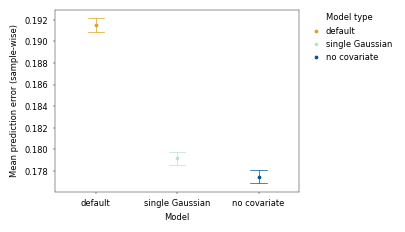

In [24]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="normalized error",
    data=prediction_errors[(prediction_errors["model"] != "scDGD")],
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_prediction_errors_by_model.png"), bbox_inches="tight", dpi=300)

In [26]:
# now look at the RMSEs of the RNA data so we can compare to scDGD
# the data was saved like this:
"""
df_sample.to_csv(
    result_path
    + data_name
    + "_rs"
    + str(random_seeds[i])
    + "_"
    + model_types[i]
    + "_ncomp"
    + str(n_components[i])
    + "_RMSE-BA_samplewise.csv"
)
"""

# load all prediction errors
prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_RMSE-BA_samplewise.csv"
    )
    # only keep columns rmse and batch
    temp_df = temp_df[["rmse", "batch"]]
    temp_df["model"] = model_name
    temp_df["rs"] = random_seeds[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
prediction_errors["normalized error"] = prediction_errors["rmse"] / modality_switch

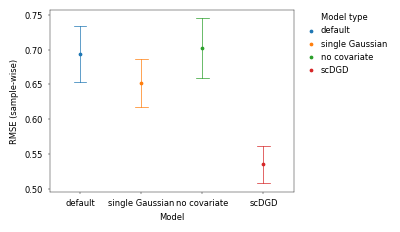

In [29]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="rmse",
    data=prediction_errors,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_RMSE_by_model.png"), bbox_inches="tight", dpi=300)

In [30]:
# now look at the BAs of the ATAC data (without the scDGD models)

# load all prediction errors
prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_descriptors):
    if model_name == "scDGD":
        continue
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs"
        + str(random_seeds[i])
        + "_"
        + model_types[i]
        + "_ncomp"
        + str(n_components[i])
        + "_RMSE-BA_samplewise.csv"
    )
    temp_df["model"] = model_name
    temp_df["rs"] = random_seeds[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])

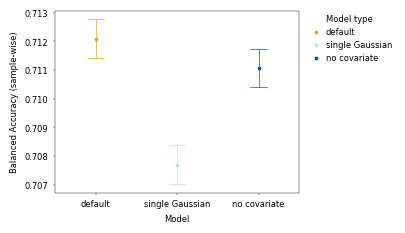

In [31]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="ba",
    data=prediction_errors,
    hue="model",
    palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Balanced Accuracy (sample-wise)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_BA_by_model.png"), bbox_inches="tight", dpi=300)

In [4]:
import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

loading model human_bonemarrow_l20_h3_rs0_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
loading model human_bonemarrow_l20_h3_rs37_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
loading model human_bonemarrow_l20_h3_rs8790_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu
printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True


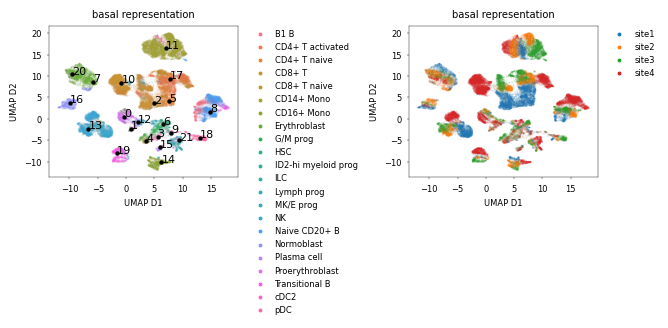

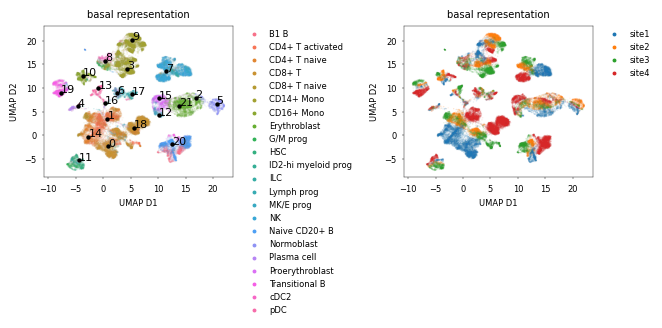

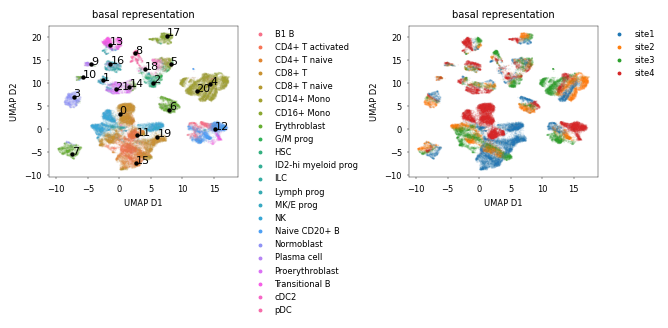

In [7]:
from omicsdgd import DGD

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs37",
    "human_bonemarrow_l20_h2-3_rs8790",
    "human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e",
    "human_bonemarrow_l20_h3_rs0_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs37_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs8790_scDGD_test50e"
]

for i, model_name in enumerate(model_names):
    if i < 9:
        continue
    print("loading model " + model_name)
    if model_types[i] == "scDGD":
        if random_seeds[i] == 0:
            modality_switch = 13431
            trainset = trainset[:, :modality_switch]
    model = DGD.load(
        data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
    )

    # make a plot with 2 subplots
    fig = plt.figure(figsize=(18 * cm, 12 * cm))
    gs = gridspec.GridSpec(2, 2)
    # add spacing
    gs.update(wspace=0.9, hspace=0.4)
    ax_list = []
    ax_list.append(fig.add_subplot(gs[0, 0]))
    # make a umap of the representations
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
    rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
    # get the gmm means
    gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
    # put the data in a dataframe so I can randomize the order
    rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
    rep_df["cell type"] = trainset.obs["cell_type"].values
    rep_df["Site"] = trainset.obs["Site"].values
    rep_df = rep_df.sample(frac=1)
    sns.scatterplot(
        x="UMAP D1",
        y="UMAP D2",
        data=rep_df,
        hue="cell type",
        s=1,
        alpha=alpha,
        linewidth=0,
        ax=ax_list[-1]
    )
    # plot the gmm means
    sns.scatterplot(
        x=gmm[:, 0],
        y=gmm[:, 1],
        s=10,
        color="black",
        alpha=1,
        linewidth=0,
        ax=ax_list[-1]
    )
    ax_list[-1].set_title("basal representation")
    for j in range(gmm.shape[0]):
        ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
    ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
    # same plot by covariate
    ax_list.append(fig.add_subplot(gs[0, 1]))
    sns.scatterplot(
        x="UMAP D1",
        y="UMAP D2",
        data=rep_df,
        hue="Site",
        s=1,
        alpha=alpha,
        linewidth=0,
        ax=ax_list[-1]
    )
    ax_list[-1].set_title("basal representation")
    ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
    if i < 6:
        ax_list.append(fig.add_subplot(gs[1, 1]))
        sns.scatterplot(
            x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
            y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
            hue=trainset.obs["Site"].values,
            s=1,
            alpha=alpha,
            linewidth=0,
            ax=ax_list[-1]
        )
        sns.scatterplot(
            x=model.correction_gmm.mean.detach().cpu().numpy()[:, 0],
            y=model.correction_gmm.mean.detach().cpu().numpy()[:, 1],
            s=10,
            color="black",
            alpha=1,
            linewidth=0,
            ax=ax_list[-1]
        )
        for j in range(model.correction_gmm.n_mix_comp):
            ax_list[-1].text(model.correction_gmm.mean.detach().cpu().numpy()[j, 0], model.correction_gmm.mean.detach().cpu().numpy()[j, 1], str(j), fontsize=8)
        ax_list[-1].set_xlabel("D1")
        ax_list[-1].set_ylabel("D2")
        ax_list[-1].set_title("covariate representation")
        ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
        ax_list.append(fig.add_subplot(gs[1, 0]))
        sns.scatterplot(
            x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
            y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
            hue=trainset.obs["cell_type"].values,
            s=1,
            alpha=alpha,
            linewidth=0,
            ax=ax_list[-1]
        )
        ax_list[-1].set_xlabel("D1")
        ax_list[-1].set_ylabel("D2")
        ax_list[-1].set_title("covariate representation")
        ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize).remove()
    # save figure
    fig.savefig(os.path.join(plot_path, model_name + "_train_representations.png"), bbox_inches="tight", dpi=300)
    model = None
    

In [5]:
# next evaluate the cell type clustering and average silhouette width of the site in the basal representations for all models
from omicsdgd.functions._metrics import clustering_metric
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scanpy as sc
from sklearn import preprocessing

from omicsdgd import DGD

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs37",
    "human_bonemarrow_l20_h2-3_rs8790",
    "human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e",
    "human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e",
    "human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e",
    "human_bonemarrow_l20_h3_rs0_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs37_scDGD_test50e",
    "human_bonemarrow_l20_h3_rs8790_scDGD_test50e"
]

clustering_df = pd.DataFrame(columns=["model", "silhouette", "model_name", "ARI (GMM)", "ARI (Leiden)"])

for i, model_name in enumerate(model_names):
    print("loading model " + model_name)
    if model_types[i] == "scDGD":
        if random_seeds[i] == 0:
            modality_switch = 13431
            trainset = trainset[:, :modality_switch]
    model = DGD.load(
        data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
    )

    asw = silhouette_score(model.representation.z.detach().cpu(), trainset.obs["Site"].values)
    ari = clustering_metric(model.representation, model.gmm, trainset.obs["cell_type"].values)

    trainset.obsm['latent'] = model.representation.z.detach().cpu().numpy()
    sc.pp.neighbors(trainset, use_rep='latent', n_neighbors=15) # default
    sc.tl.leiden(trainset, key_added='clusters', resolution=1) # default
    n_clusters = len(np.unique(trainset.obs['clusters'].values))
    le = preprocessing.LabelEncoder()
    le.fit(trainset.obs['cell_type'].values)
    true_labels = le.transform(trainset.obs['cell_type'].values)
    cluster_labels = trainset.obs['clusters'].values.astype(int)
    ari_leiden = adjusted_rand_score(true_labels, np.asarray(cluster_labels))
    print(model_name, asw, ari)

    clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)
    
    model = None

# save the dataframe
clustering_df.to_csv(os.path.join(result_path, "human_bonemarrow_clustering_metrics_2.csv"))

loading model human_bonemarrow_l20_h2-3_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_test50e -0.06146073 0.6472531789980008
loading model human_bonemarrow_l20_h2-3_rs37
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs37 -0.05920485 0.5698672053335025
loading model human_bonemarrow_l20_h2-3_rs8790
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs8790 -0.05756486 0.6414866282675186
loading model human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs0_ncomp1_test50e -0.027471261 0.0
loading model human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs37_ncomp1_test50e -0.019633716 0.0
loading model human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)



        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
correction_test_rep.z
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs8790_ncomp1_test50e -0.019871578 0.0
loading model human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs0_noCovariate_test50e -0.041310363 0.522076089869218
loading model human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs37_noCovariate_test50e -0.047740396 0.5868080701023685
loading model human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h2-3_rs8790_noCovariate_test50e -0.04458166 0.528835651260277
loading model human_bonemarrow_l20_h3_rs0_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h3_rs0_scDGD_test50e -0.025231127 0.6335185101430216
loading model human_bonemarrow_l20_h3_rs37_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h3_rs37_scDGD_test50e -0.019185793 0.5724823261295492
loading model human_bonemarrow_l20_h3_rs8790_scDGD_test50e
CUDA Available: False
Number of GPUs: 0
using device:  cpu


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


printing all checkpoint keys containing 'correction'
#######################
Training status
#######################
True
human_bonemarrow_l20_h3_rs8790_scDGD_test50e -0.022549385 0.46329290872113366


/var/folders/tp/pr1hfl8527z35j1791t_j9bc0000gn/T/ipykernel_16529/2216781976.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_df = clustering_df.append({"model": model_descriptors[i], "silhouette": asw, "ARI (GMM)": ari, "ARI (Leiden)": ari_leiden, "model_name": model_name}, ignore_index=True)


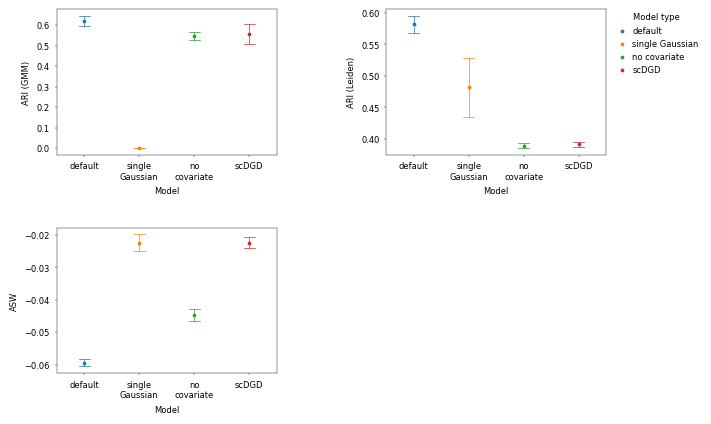

In [16]:
# load the dataframe and make a pointplot

clustering_df = pd.read_csv(os.path.join(result_path, "human_bonemarrow_clustering_metrics_2.csv"))

# new figure
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.5, hspace=0.5)
ax_list = []
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.pointplot(
    x="model",
    y="silhouette",
    data=clustering_df,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
# insert line breaks into x tick labels
labels = ax_list[-1].get_xticklabels()
new_labels = []
for label in labels:
    new_labels.append(label.get_text().replace(" ", "\n"))
ax_list[-1].set_xticklabels(new_labels)
ax_list[-1].set_ylabel("ASW")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="model",
    y="ARI (GMM)",
    data=clustering_df,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_xticklabels(new_labels)
ax_list[-1].set_ylabel("ARI (GMM)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.pointplot(
    x="model",
    y="ARI (Leiden)",
    data=clustering_df,
    hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_xticklabels(new_labels)
ax_list[-1].set_ylabel("ARI (Leiden)")
ax_list[-1].set_xlabel("Model")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "performance_human_bonemarrow_clustering_metrics.png"), bbox_inches="tight", dpi=300)

## starting with too many components

In [3]:
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

In [7]:
model_name = "human_bonemarrow_l20_h2-3_rs0_ncomp50_adaptive_noCovPrior"

from omicsdgd import DGD
model = DGD.load(
    data=trainset, save_dir=save_dir + data_name + "/", model_name=model_name
)

CUDA Available: False
Number of GPUs: 0
using device:  cpu

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
printing all checkpoint keys containing 'correction'
correction_gmm.mean
correction_gmm.neglogvar
correction_gmm.weight
correction_rep.z
correction_val_rep.z
#######################
Training status
#######################
True


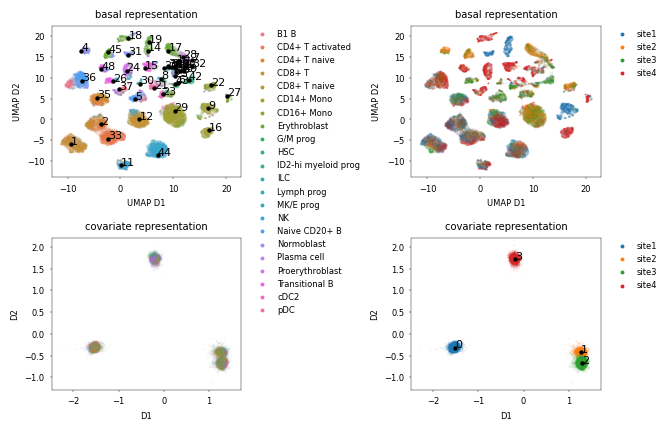

In [8]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 12 * cm))
gs = gridspec.GridSpec(2, 2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs["cell_type"].values
rep_df["Site"] = trainset.obs["Site"].values
rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
# same plot by covariate
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="Site",
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
ax_list.append(fig.add_subplot(gs[1, 1]))
sns.scatterplot(
    x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
    y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
    hue=trainset.obs["Site"].values,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
sns.scatterplot(
    x=model.correction_gmm.mean.detach().cpu().numpy()[:, 0],
    y=model.correction_gmm.mean.detach().cpu().numpy()[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
for j in range(model.correction_gmm.n_mix_comp):
    ax_list[-1].text(model.correction_gmm.mean.detach().cpu().numpy()[j, 0], model.correction_gmm.mean.detach().cpu().numpy()[j, 1], str(j), fontsize=8)
ax_list[-1].set_xlabel("D1")
ax_list[-1].set_ylabel("D2")
ax_list[-1].set_title("covariate representation")


ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)
ax_list.append(fig.add_subplot(gs[1, 0]))
sns.scatterplot(
    x=model.correction_rep.z.detach().cpu().numpy()[:, 0],
    y=model.correction_rep.z.detach().cpu().numpy()[:, 1],
    hue=trainset.obs["cell_type"].values,
    s=1,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_xlabel("D1")
ax_list[-1].set_ylabel("D2")
ax_list[-1].set_title("covariate representation")
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize).remove()
# save figure
fig.savefig(os.path.join(plot_path, model_name + "_train_representations.png"), bbox_inches="tight", dpi=300)

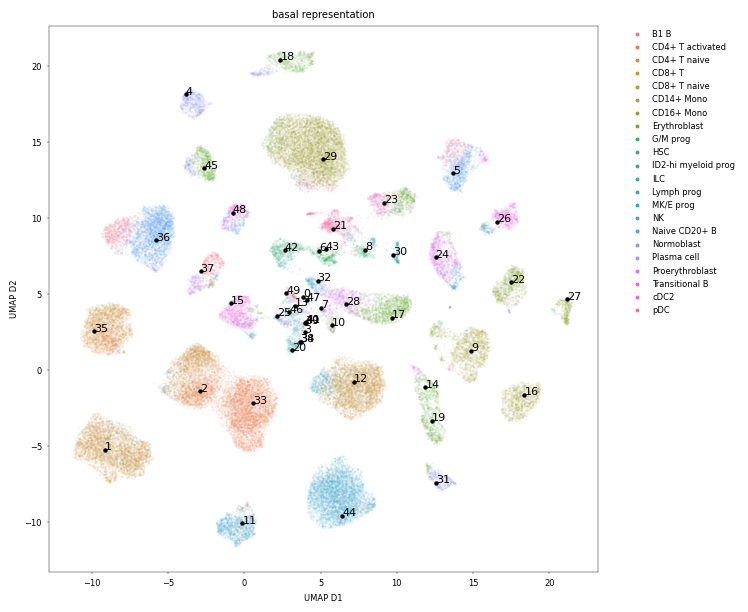

In [10]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 18 * cm))
gs = gridspec.GridSpec(1,1)
# add spacing
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(model.representation.z.detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(model.gmm.mean.detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
rep_df["cell type"] = trainset.obs["cell_type"].values
rep_df["Site"] = trainset.obs["Site"].values
rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

## mosaic data

In [3]:
data_name = "human_bonemarrow"
result_path = "../results/revision/analysis/batch_integration/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

import anndata as ad

# load data
save_dir = "../results/trained_models/"
data_name = "human_bonemarrow"
adata = ad.read_h5ad("../../data/" + data_name + ".h5ad")
adata.X = adata.layers["counts"]
df_unpaired = pd.read_csv('../../data/'+data_name+'_unpairing.csv')
train_indices = list(np.where(adata.obs["train_val_test"] == "train")[0])
test_indices = list(np.where(adata.obs["train_val_test"] == "test")[0])
trainset = adata[train_indices, :].copy()
adata = None

In [4]:
trainset.obs["modality"] = df_unpaired[df_unpaired["fraction_unpaired"] == 0.1]["modality"].values

model_name = "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent"

import torch
checkpoint = torch.load(
    save_dir + data_name + "/"  + model_name + ".pt", map_location=torch.device("cpu")
)

In [10]:
def sort_by_modality(df, column, modality_order):
    out_list = []
    for mod in modality_order:
        out_list.append(df[df["modality"] == mod][column].values)
    return np.concatenate(out_list)

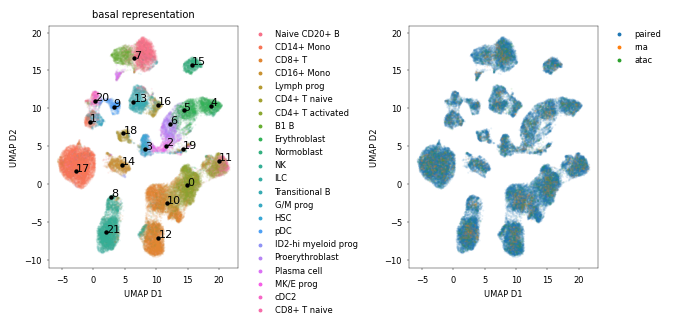

In [12]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 8 * cm))
gs = gridspec.GridSpec(1,2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(checkpoint["representation.z"].detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(checkpoint["gmm.mean"].detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
# get celltypes, sites, and modalities in the order of the modality values "paired", "rna", "atac"
celltypes = sort_by_modality(trainset.obs, "cell_type", ["paired","rna","atac"])
sites = sort_by_modality(trainset.obs, "Site", ["paired","rna","atac"])
modalities = sort_by_modality(trainset.obs, "modality", ["paired","rna","atac"])
rep_df["cell type"] = celltypes
rep_df["Site"] = sites
rep_df["modality"] = modalities
#rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="modality",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

In [13]:
trainset.obs["modality"] = df_unpaired[df_unpaired["fraction_unpaired"] == 0.5]["modality"].values

model_name = "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent"

import torch
checkpoint = torch.load(
    save_dir + data_name + "/"  + model_name + ".pt", map_location=torch.device("cpu")
)

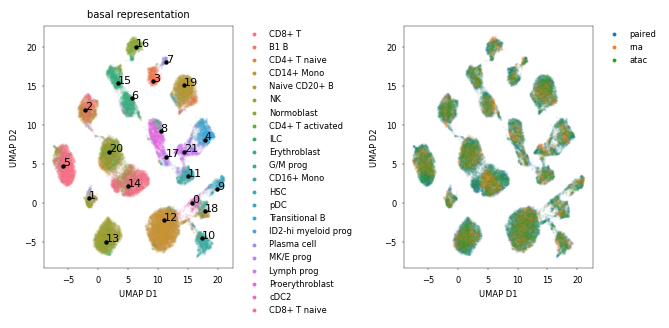

In [14]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 8 * cm))
gs = gridspec.GridSpec(1,2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(checkpoint["representation.z"].detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(checkpoint["gmm.mean"].detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
# get celltypes, sites, and modalities in the order of the modality values "paired", "rna", "atac"
celltypes = sort_by_modality(trainset.obs, "cell_type", ["paired","rna","atac"])
sites = sort_by_modality(trainset.obs, "Site", ["paired","rna","atac"])
modalities = sort_by_modality(trainset.obs, "modality", ["paired","rna","atac"])
rep_df["cell type"] = celltypes
rep_df["Site"] = sites
rep_df["modality"] = modalities
#rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="modality",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

In [15]:
trainset.obs["modality"] = df_unpaired[df_unpaired["fraction_unpaired"] == 0.9]["modality"].values

model_name = "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent"

import torch
checkpoint = torch.load(
    save_dir + data_name + "/"  + model_name + ".pt", map_location=torch.device("cpu")
)

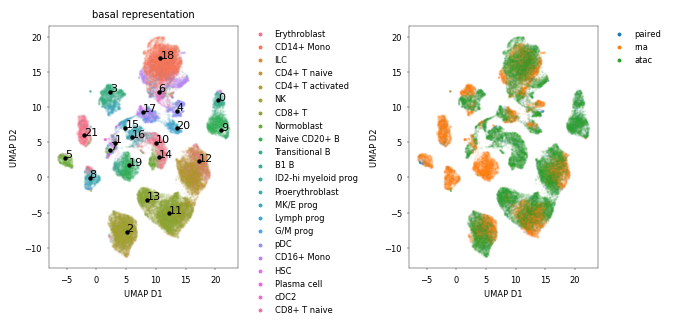

In [16]:
# make a plot with 2 subplots
fig = plt.figure(figsize=(18 * cm, 8 * cm))
gs = gridspec.GridSpec(1,2)
# add spacing
gs.update(wspace=0.9, hspace=0.4)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
# make a umap of the representations
reducer = umap.UMAP(n_neighbors=15, min_dist=0.5)
rep = reducer.fit_transform(checkpoint["representation.z"].detach().cpu().numpy())
# get the gmm means
gmm = reducer.transform(checkpoint["gmm.mean"].detach().cpu().numpy())
# put the data in a dataframe so I can randomize the order
rep_df = pd.DataFrame(rep, columns=["UMAP D1", "UMAP D2"])
# get celltypes, sites, and modalities in the order of the modality values "paired", "rna", "atac"
celltypes = sort_by_modality(trainset.obs, "cell_type", ["paired","rna","atac"])
sites = sort_by_modality(trainset.obs, "Site", ["paired","rna","atac"])
modalities = sort_by_modality(trainset.obs, "modality", ["paired","rna","atac"])
rep_df["cell type"] = celltypes
rep_df["Site"] = sites
rep_df["modality"] = modalities
#rep_df = rep_df.sample(frac=1)
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="cell type",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
# plot the gmm means
sns.scatterplot(
    x=gmm[:, 0],
    y=gmm[:, 1],
    s=10,
    color="black",
    alpha=1,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].set_title("basal representation")
for j in range(gmm.shape[0]):
    ax_list[-1].text(gmm[j, 0], gmm[j, 1], str(j), fontsize=8)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

ax_list.append(fig.add_subplot(gs[0, 1]))
sns.scatterplot(
    x="UMAP D1",
    y="UMAP D2",
    data=rep_df,
    hue="modality",
    s=2,
    alpha=alpha,
    linewidth=0,
    ax=ax_list[-1]
)
ax_list[-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False, markerscale=handlesize)

fig.savefig(os.path.join(plot_path, model_name + "_train_representations_closeup.png"), bbox_inches="tight", dpi=300)

In [10]:
# load all prediction errors

data_name = "human_bonemarrow"
n_features_bm = 129921
fractions_unpaired = [0, 0.1, 0.5, 0.9]
result_path = "../results/revision/analysis/mosaic/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent_test50e"
]

prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_names):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs0_mosaic"
        + str(fractions_unpaired[i])
        + "_prediction_errors_supervised.csv"
    )
    temp_df["model"] = model_name
    temp_df["fraction unpaired"] = fractions_unpaired[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


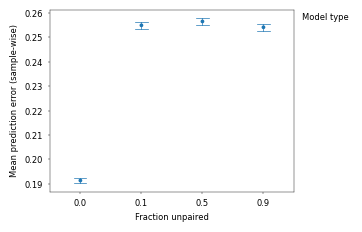

In [11]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="normalized error",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Mean prediction error (sample-wise)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_prediction_errors_by_model.png"), bbox_inches="tight", dpi=300)

In [12]:
# load all prediction errors

data_name = "human_bonemarrow"
n_features_bm = 129921
fractions_unpaired = [0, 0.1, 0.5, 0.9]
result_path = "../results/revision/analysis/mosaic/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent_test50e"
]

prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_names):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs0_mosaic"
        + str(fractions_unpaired[i])
        + "_RMSE-BA_samplewise.csv"
    )
    temp_df["model"] = model_name
    temp_df["fraction unpaired"] = fractions_unpaired[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
#prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


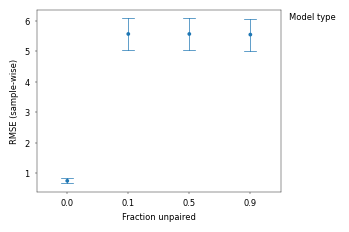

In [13]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="rmse",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("RMSE (sample-wise)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_RMSE_by_model.png"), bbox_inches="tight", dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


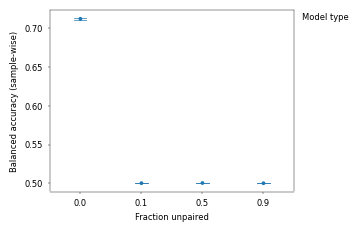

In [14]:
# plot the errors by model as point plot with standard error

# new figure
fig = plt.figure(figsize=(8 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 1)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="ba",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("Balanced accuracy (sample-wise)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(
    title="Model type",
    bbox_to_anchor=(1.02, 1),
    loc=2,
    borderaxespad=0.0,
    frameon=False,
    handletextpad=handletextpad * 2,
)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_BA_by_model.png"), bbox_inches="tight", dpi=300)

In [15]:
# load all prediction errors

data_name = "human_bonemarrow"
n_features_bm = 129921
fractions_unpaired = [0, 0.1, 0.5, 0.9]
result_path = "../results/revision/analysis/mosaic/" + data_name + "/"
plot_path = "../results/revision/plots/" + data_name + "/"

model_names = [
    "human_bonemarrow_l20_h2-3_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.1percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.5percent_test50e",
    "human_bonemarrow_l20_h2-3_rs0_mosaic0.9percent_test50e"
]

prediction_errors = pd.DataFrame()
for i, model_name in enumerate(model_names):
    temp_df = pd.read_csv(
        result_path
        + data_name
        + "_rs0_mosaic"
        + str(fractions_unpaired[i])
        + "_clustering_metrics.csv"
    )
    temp_df["model"] = model_name
    temp_df["fraction unpaired"] = fractions_unpaired[i]
    prediction_errors = pd.concat([prediction_errors, temp_df])
#prediction_errors["normalized error"] = prediction_errors["error"] / n_features_bm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


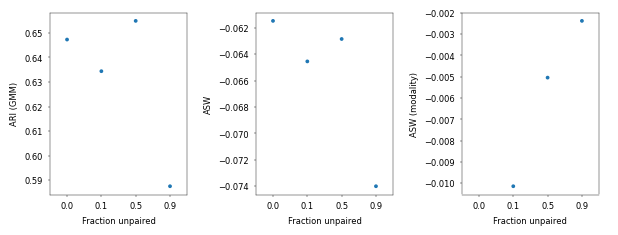

In [17]:
# plot the ARI, ASW and ASW (modality)

# new figure
fig = plt.figure(figsize=(18 * cm, 6 * cm))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.5, hspace=0.5)
ax_list = []
ax_list.append(fig.add_subplot(gs[0, 0]))
sns.pointplot(
    x="fraction unpaired",
    y="ARI (GMM)",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ARI (GMM)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 1]))
sns.pointplot(
    x="fraction unpaired",
    y="silhouette",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ASW")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend().remove()
ax_list.append(fig.add_subplot(gs[0, 2]))
sns.pointplot(
    x="fraction unpaired",
    y="silhouette (modality)",
    data=prediction_errors,
    #hue="model",
    #palette=palette_3colrs,
    ax=ax_list[-1],
    join=False,
    #dodge=0.5,
    markers=".",
    scale=0.5,
    errorbar="se",
    errwidth=0.5,
    capsize=0.2
)
ax_list[-1].set_ylabel("ASW (modality)")
ax_list[-1].set_xlabel("Fraction unpaired")
ax_list[-1].legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0, frameon=False, handletextpad=handletextpad * 2)
# save
fig.savefig(os.path.join(plot_path, "mosaic_performance_human_bonemarrow_clustering_metrics_by_model.png"), bbox_inches="tight", dpi=300)